<a href="https://colab.research.google.com/github/jtanzi56/Inspection-Data/blob/main/Wine_Data_jtanzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Sales Modeling
By: Jacob Tanzi

Will use the wine sales data to predict the price of wine

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report

import warnings
warnings.filterwarnings('ignore')

In [330]:
df = pd.read_csv("/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/wines_SPA.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


## Cleaning and EDA

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [332]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [333]:
df.duplicated().sum()

5452

In [334]:
df.drop_duplicates( keep='first', inplace=True, ignore_index=False)

In [335]:
df.duplicated().sum()

0

In [336]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [337]:
 df.drop(columns=['country'], inplace=True)
 df.head()


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [338]:
df.nunique()

winery          480
wine            847
year             71
rating            8
num_reviews     817
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

In [339]:
pd.Series({c: df[c].unique() for c in df})

winery         [Teso La Monja, Artadi, Vega Sicilia, Pago de ...
wine           [Tinto, Vina El Pison, Unico, Unico Reserva Es...
year           [2013, 2018, 2009, 1999, 1996, 1998, 2010, 199...
rating                  [4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2]
num_reviews    [58, 31, 1793, 1705, 1309, 1209, 1201, 926, 64...
region         [Toro, Vino de Espana, Ribera del Duero, Monti...
price          [995.0, 313.5, 324.95, 692.96, 778.06, 490.0, ...
type           [Toro Red, Tempranillo, Ribera Del Duero Red, ...
body                                   [5.0, 4.0, 3.0, nan, 2.0]
acidity                                     [3.0, 2.0, 1.0, nan]
dtype: object

In [340]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [341]:
df.isna().sum() / len(df) * 100

winery          0.000000
wine            0.000000
year            0.097656
rating          0.000000
num_reviews     0.000000
region          0.000000
price           0.000000
type            5.175781
body           13.232422
acidity        13.232422
dtype: float64

In [342]:
df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

* checking for typos or inconsistency

In [343]:
pd.set_option('display.max_rows', None)
df['type'].value_counts().sort_index(ascending=True)

Albarino                 34
Cabernet Sauvignon       11
Cava                     33
Chardonnay               13
Grenache                 35
Mencia                   17
Monastrell               18
Montsant Red             17
Pedro Ximenez            35
Priorat Red             238
Red                     210
Ribera Del Duero Red    535
Rioja Red               451
Rioja White              37
Sauvignon Blanc           4
Sherry                   56
Sparkling                 5
Syrah                    15
Tempranillo              73
Toro Red                 78
Verdejo                  27
Name: type, dtype: int64

In [344]:
pd.set_option('display.max_rows', None)
df['region'].value_counts().sort_index(ascending=True)

Abona                                1
Alella                               4
Alicante                            15
Almansa                              7
Andalucia                            4
Aragon                               2
Arinzano                             3
Arribes                              1
Bierzo                              26
Binissalem-Mallorca                  1
Cadiz                                7
Calatayud                            2
Campo de Borja                      16
Carinena                             3
Castilla                             8
Castilla y Leon                     51
Cataluna                            10
Cava                                34
Cigales                              2
Conca de Barbera                     6
Condado de Huelva                    1
Costers del Segre                   14
Dehesa del Carrizal                  3
Dominio de Valdepusa                 4
El Terrerazo                         4
Emporda                  

In [345]:
pd.set_option('display.max_rows', None)
df['wine'].value_counts().sort_index(ascending=True)

1194                                                                       1
17                                                                         1
1730 Amontillado                                                           1
1730 Pedro Ximenez                                                         1
1902 Centenary Carignan Priorat                                            4
1903 Centenary Grenache                                                    1
200 Cestos Godello                                                         1
200 Monges Edicion Exclusiva Blanco Reserva                                1
200 Monges Rioja Gran Reserva                                              2
200 Monges Rioja Reserva                                                   5
200 Monges Rioja Reserva Seleccion Especial                                1
200 Monges Rioja Seleccion Especial Reserva Blanco                         1
27 Ribera del Duero                                                        3

In [346]:
pd.set_option('display.max_rows', None)
df['winery'].value_counts().sort_index(ascending=True)

A Coroa                                              1
AGE                                                  1
Aalto                                               12
Abadal                                               3
Abadia Retuerta                                     27
Abel Mendoza Monge                                   4
Acustic Celler                                       1
Adama Wines                                          4
Adega Familiar Eladio Pineiro                        1
Agusti Torello Mata                                  5
Albamar                                              1
Albet i Noya                                         2
Algueira                                             1
Alion                                               16
Allende                                             14
Alonso & Pedrajo                                     1
Alonso del Yerro                                     2
Alta Alella                                          4
Altanza   

## Outlier Visuals

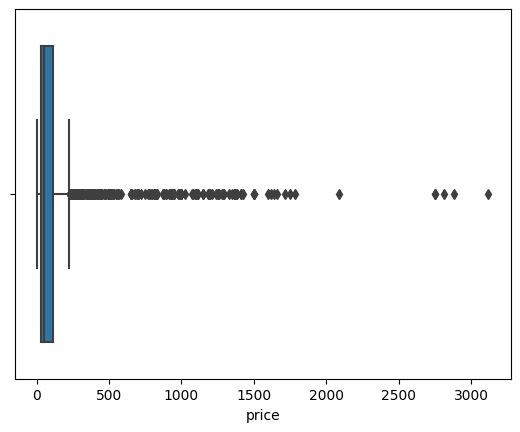

In [347]:
ax = sns.boxplot(data = df, x = 'price');

In [348]:
df.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


* is 3119.08 an outlier that is incorrect?

In [349]:
target_integer = 3119.080000
found_rows = df[df['price'] == target_integer]
print(found_rows)

                           winery                          wine  year  rating  \
338  Descendientes de J. Palacios  La Faraona Bierzo (Corullon)  2010     4.6   

     num_reviews  region    price type  body  acidity  
338           28  Bierzo  3119.08  Red   4.0      3.0  


In [350]:
df.loc[df['winery'] == 'Descendientes de J. Palacios']



,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
43,Descendientes de J. Palacios,La Faraona Bierzo (Corullon),2017,4.8,26,Bierzo,1098.90,Red,4.0,3.0
293,Descendientes de J. Palacios,Moncerbal Bierzo (Corullon),2016,4.6,48,Bierzo,269.95,Mencia,3.0,3.0
316,Descendientes de J. Palacios,Valdafoz Bierzo (Corullon),2011,4.6,38,Bierzo,135.50,Mencia,3.0,3.0
338,Descendientes de J. Palacios,La Faraona Bierzo (Corullon),2010,4.6,28,Bierzo,3119.08,Red,4.0,3.0
595,Descendientes de J. Palacios,La Faraona Bierzo (Corullon),2015,4.5,36,Bierzo,1373.66,Red,4.0,3.0
602,Descendientes de J. Palacios,Las Lamas Bierzo (Corullon),2018,4.5,32,Bierzo,120.00,Mencia,3.0,3.0
1501,Descendientes de J. Palacios,Las Lamas Bierzo (Corullon),2016,4.3,100,Bierzo,95.25,Mencia,3.0,3.0
1684,Descendientes de J. Palacios,Las Lamas Bierzo (Corullon),2017,4.3,44,Bierzo,106.92,Mencia,3.0,3.0


* this winery has other 'type' Red that are over 1000 Euros
* I think the price could be accurate
* will look at price column to id ouliers to drop

In [351]:
df['price'].value_counts().sort_index(ascending=True)

4.990000        1
5.500000        1
6.260000        1
6.950000        1
6.990000        1
7.100000        2
7.890000        1
7.900000        1
8.570000        1
8.900000        2
8.950000        2
9.760000        1
9.884034        1
9.900000        1
9.950000        1
9.990000        1
10.200000       1
10.450000       1
10.760000       1
10.890000       1
11.200000       2
11.350000       1
11.500000       1
11.650000       1
11.660000       1
11.800000       1
11.900000       2
11.910000       1
11.940000       1
11.950000       2
11.990000       1
12.000000       2
12.190000       1
12.290000       1
12.800000       1
12.900000       1
13.237545       1
13.450000       2
13.500000       1
13.580000       2
13.650000       1
13.750000       2
13.950000       3
13.990000       2
14.180000       1
14.500000       1
14.600000       1
14.650000       1
14.710000       1
14.800000       1
14.900000       2
14.950000       1
14.960000       1
15.000000       1
15.443803       1
15.450000 

## Correlation Visuals

               rating  num_reviews     price      body   acidity
rating       1.000000    -0.098582  0.507287  0.211610 -0.099273
num_reviews -0.098582     1.000000 -0.065395  0.104146  0.062388
price        0.507287    -0.065395  1.000000  0.166371 -0.000420
body         0.211610     0.104146  0.166371  1.000000 -0.086990
acidity     -0.099273     0.062388 -0.000420 -0.086990  1.000000


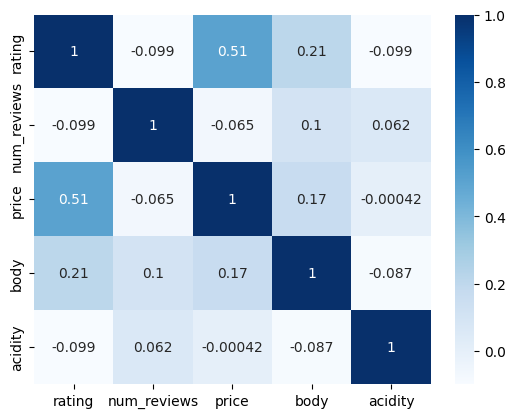

In [352]:
print(df.corr())

dataplot = sns.heatmap(df.corr(), cmap='Blues', annot=True)

* no correlation between number of reviews
* will drop column

In [353]:
df.drop(columns=['num_reviews'], inplace=True)

In [354]:
# code from fundamental course
def hist_box_plot(column_name, unit_of_measure, bin_count):
    fig, (ax1,ax2) = plt.subplots(nrows =2, sharex=True, figsize=(8, 6),
                                  facecolor='w',
                                  gridspec_kw={'height_ratios':[0.75, 0.25]})
    plt.suptitle(f'{column_name}', y=1.02, va='center',
                 fontsize = 22, weight='bold')
    sns.histplot(data=df, x=column_name, linewidth=2,
                 ax=ax1, bins=bin_count);
    plt.xlabel(unit_of_measure, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    ax1.set_ylabel('Instances',fontweight='bold',fontsize=18)
    ax1.tick_params( labelsize=10)
    ax1.set_yticklabels(ax1.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(3)
    sns.boxplot(data=df, x=column_name, width=.5, ax=ax2,);
    ax2.tick_params( labelsize=10)
    ax2.set(xlabel=unit_of_measure);
    ax2.set_xticklabels(ax2.get_xticks(), fontweight='bold')
    ax2.spines['bottom'].set_linewidth(2)
    ax2.spines['top'].set_color(None)
    ax2.spines['left'].set_color(None)
    ax2.spines['right'].set_color(None)
    plt.tight_layout();
    plt.show;

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'body'}>,
        <Axes: title={'center': 'acidity'}>]], dtype=object)

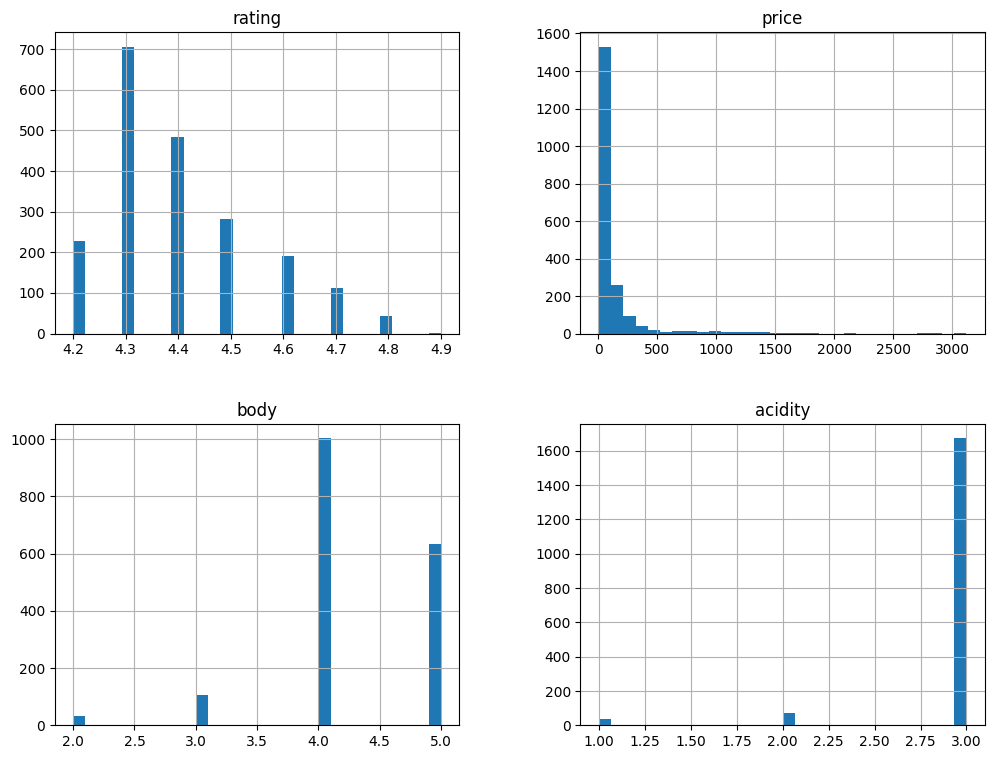

In [355]:
df.hist(figsize=(12,9), bins=30)

* Rounding price to get cleaner target

In [356]:
df['price'] = df['price'].round(1)
df.head()

,winery,wine,year,rating,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,Toro,995.0,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,Vino de Espana,313.5,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,Ribera del Duero,325.0,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,Ribera del Duero,693.0,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,Ribera del Duero,778.1,Ribera Del Duero Red,5.0,3.0


In [357]:
df.nunique()

winery     480
wine       847
year        71
rating       8
region      76
price      949
type        21
body         4
acidity      3
dtype: int64


 rating 



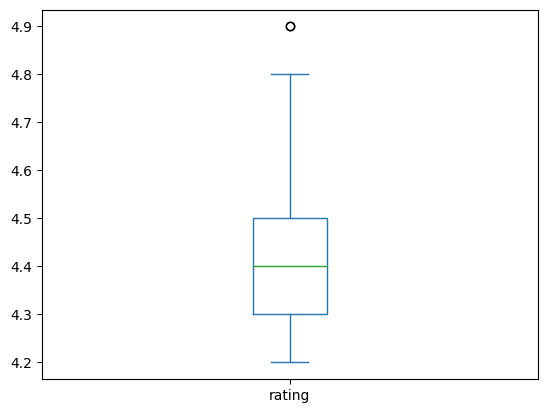


 price 



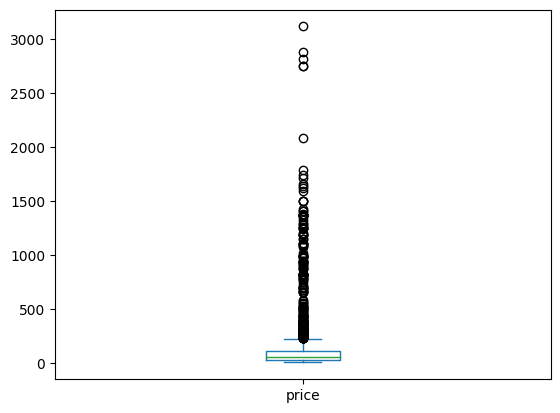


 body 



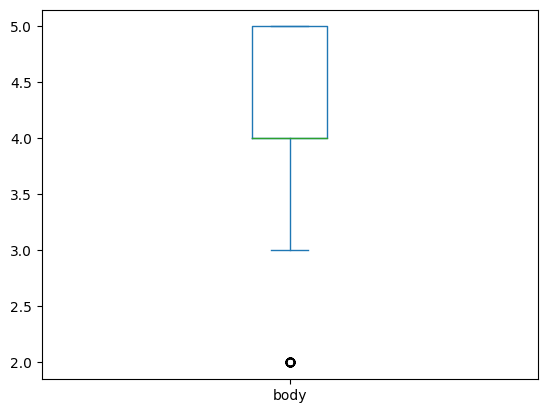


 acidity 



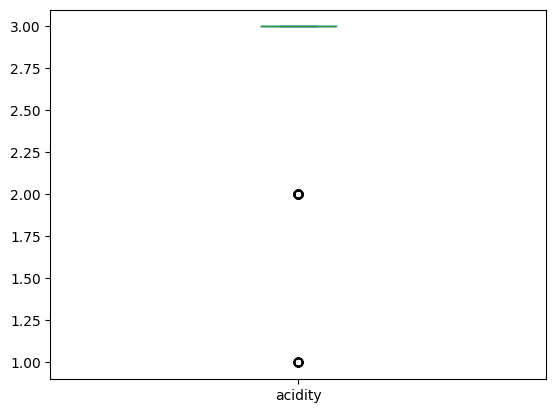

In [358]:
for col in df.select_dtypes('number'):
  print('\n', col, '\n')
  df[col].plot(kind='box')
  plt.show()

In [359]:
# source: https://plotly.com/python/line-and-scatter/
num_var = ['body', 'acidity', 'rating', 'price']
cat_var = 'type'
fig = px.scatter_matrix(df, dimensions=num_var, color=cat_var)
fig.update_traces(diagonal_visible=True)
fig.show()

## Feature Engineering

In [360]:
for col in df.select_dtypes('object'):
  print(col, df[col].nunique())

winery 480
wine 847
year 71
region 76
type 21


* Going to drop winery and wine for high cardinality

In [361]:
df.drop(columns=['wine','winery'], inplace=True)

In [362]:
df.describe()

,rating,price,body,acidity
count,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,135.246826,4.258863,2.921216
std,0.147023,272.176893,0.652836,0.334713
min,4.200000,5.000000,2.000000,1.000000
25%,4.300000,31.900000,4.000000,3.000000
50%,4.400000,53.650000,4.000000,3.000000
75%,4.500000,110.000000,5.000000,3.000000
max,4.900000,3119.100000,5.000000,3.000000


##Train Test Split

In [363]:
def eval_regression(true, pred, name='Model'):
  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['RMSE'] = [np.sqrt(mean_squared_error(true, pred))]
  scores['MAE'] = [mean_absolute_error(true, pred)]
  scores['R2'] = [r2_score(true, pred)]
  return scores

In [364]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)

In [365]:
X_train.head()

,year,rating,region,type,body,acidity
415,2018,4.5,Jumilla,Monastrell,5.0,3.0
273,1983,4.6,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
759,2017,4.4,Valencia,Red,4.0,3.0
250,2018,4.6,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
413,2015,4.5,Ribera del Duero,Ribera Del Duero Red,5.0,3.0


In [366]:
from sklearn.preprocessing import LabelEncoder

In [367]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
label_encoder = LabelEncoder()
mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

ord_cols = ['body', 'acidity']
num_cols = make_column_selector('rating')
cat_cols = make_column_selector(dtype_include='object')


num_pipe = make_pipeline(mean_imputer, scaler,)
cat_pipe = make_pipeline(missing_imputer, ohe)
ord_pipe = make_pipeline(scaler, mean_imputer)

processor = make_column_transformer((num_pipe, num_cols),
                                    (ord_pipe, ord_cols),
                                    (cat_pipe, cat_cols))

print(processor.fit_transform(X_train).shape)

(1536, 160)


In [368]:
ord_pipe = make_pipeline(scaler, label_encoder)

In [369]:
scores = pd.DataFrame()
linreg = LinearRegression()
lin_pipe = make_pipeline(processor, linreg)
lin_pipe.fit(X_train, y_train)

train_pred = lin_pipe.predict(X_train)
test_pred = lin_pipe.predict(X_test)

In [370]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

lin_scores = pd.concat([train_scores, test_scores])
lin_scores

,Model Name,RMSE,MAE,R2
0,Train,2.004975e+02,1.098187e+02,4.714312e-01
0,Test,9.330192e+12,1.531159e+12,-1.282961e+21


In [371]:
print(f'Training R2 {r2_score(y_train, train_pred):.2f}')
print(f'Test R2 {r2_score(y_test, test_pred):.2f}')

Training R2 0.47
Test R2 -1282960879628784238592.00


## Gridsearch CV

In [372]:

R_for = RandomForestRegressor()
for_pipe = make_pipeline(processor, R_for)
for_pipe.fit(X_train, y_train)
for_pipe.get_params()


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f31e4e93d30>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer())]),
                                    ['body', 'acidity']),
                                   ('pipeline-3',
                                    Pipeline(ste

In [378]:
pipe_param_grid = {'randomforestregressor__n_estimators': [5, 10, 20],
                   'randomforestregressor__min_samples_split': [20, 40, 80],
                   'randomforestregressor__max_depth': [None, 5, 10]}

In [379]:
for_pipe_gs = GridSearchCV(for_pipe, pipe_param_grid)

for_pipe_gs.fit(X_train, y_train)
print('Best Forest Parameters:')
print(for_pipe_gs.best_params_)
best_pipe = for_pipe_gs.best_estimator_
print(f'Accuracy of best forest model is: {best_pipe.score(X_test, y_test)}')

Best Forest Parameters:
{'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_split': 40, 'randomforestregressor__n_estimators': 10}
Accuracy of best forest model is: 0.29875006134554516


##PCA

In [375]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
label_encoder = LabelEncoder()
mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

ord_cols = ['body', 'acidity']
num_cols = make_column_selector('rating')
cat_cols = make_column_selector(dtype_include='object')


num_pipe = make_pipeline(scaler, PCA(n_components=1))
cat_pipe = make_pipeline(missing_imputer, ohe)
ord_pipe = make_pipeline(scaler, mean_imputer)

processor = make_column_transformer((num_pipe, num_cols),
                                    (ord_pipe, ord_cols),
                                    (cat_pipe, cat_cols))

print(processor.fit_transform(X_train).shape)

(1536, 160)


##Modeling



Ensure that you complete the appropriate pre-processing steps.
Fit and evaluate multiple types of models on your data.
Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
Use GridSearchCV to tune some of the hyperparameters of each model.
Display the metrics of your best tuned version of each model type.
Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results.
We encourage you to try multiple techniques depending on your data!
Choose your "production" model and justify this decision using the metrics most important to your business problem.
Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).